In [1]:
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt

def load_latencies(path):
    with open(path) as f:
        data = json.load(f)

    sizes = np.array([i for i in range(2, 16)])

    latency_data = []

    for size in sizes:
        # if size == 9 or size == 12:
        #     latency_data.append([0])  # Adding a dummy entry for consistency
        #     continue

        if str(size) not in data:
            latency_data.append([0])
            continue

        key = str(size)
        np_array = np.array(data[key])

        # Filter out values greater than 500
        # np_array = np_array[np_array < 500]

        latency_data.append(np_array)

    return latency_data, sizes, data

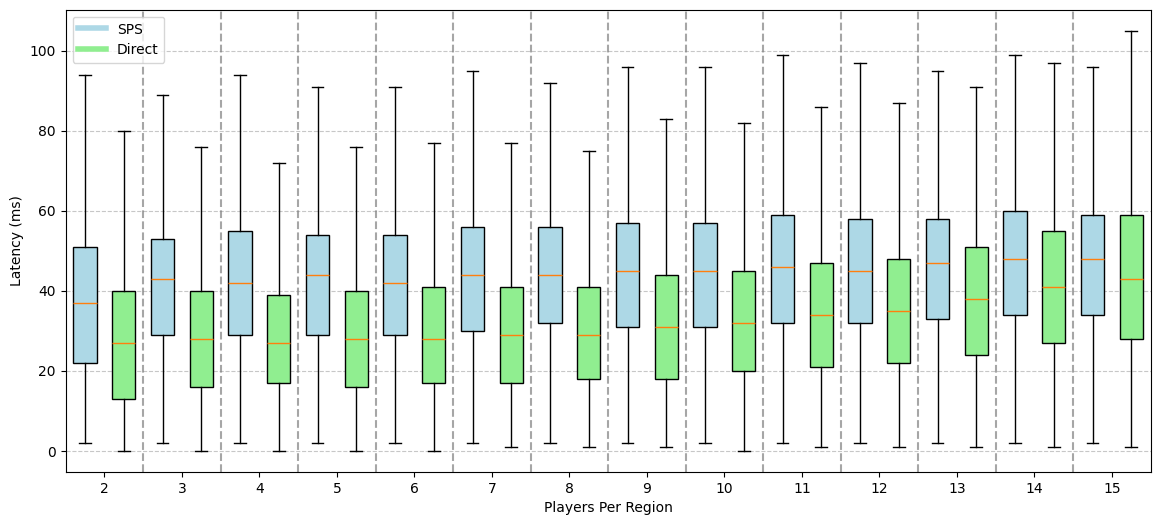

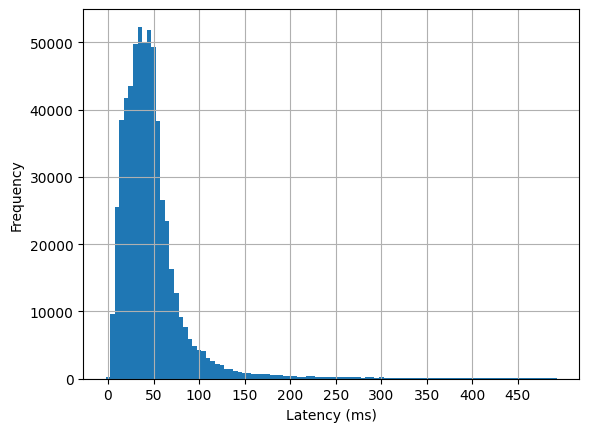

Mode: 35ms


In [2]:
latency_data_sps, sizes_sps, data_sps = load_latencies('../results/latency/latencies-sps.json')
latency_data_direct, sizes_direct, data_direct = load_latencies('../results/latency/latencies-direct.json')

# Prepare combined data and positions
combined_data = []
positions = []

for i, size in enumerate(sizes_sps):
    combined_data.append(latency_data_sps[i])
    combined_data.append(latency_data_direct[i])
    positions.append(i * 2 + 1)  # Position for SPS
    positions.append(i * 2 + 2)  # Position for Direct

# Create the plot
fig, ax = plt.subplots(figsize=(14, 6))

# Plot the combined data
boxplots = ax.boxplot(
    combined_data, positions=positions, widths=0.6, patch_artist=True, showfliers=False
)

# Set distinct colors for SPS (blue) and Direct (orange)
colors = ['lightblue', 'lightgreen']
for i, patch in enumerate(boxplots['boxes']):
    patch.set_facecolor(colors[i % 2])

# Set x-ticks to display player sizes, spaced properly
ax.set_xticks([1.5 + i * 2 for i in range(len(sizes_sps))])
ax.set_xticklabels(sizes_sps)

# Add vertical lines to separate each group of two boxplots
for i in range(1, len(sizes_sps)):
    plt.axvline(x=i * 2 + 0.5, color='gray', linestyle='--', alpha=0.7)

# Formatting
ax.set_xlabel('Players Per Region')
ax.set_ylabel('Latency (ms)')
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Add a legend for the colors
legend_patches = [
    plt.Line2D([0], [0], color='lightblue', lw=4, label='SPS'),
    plt.Line2D([0], [0], color='lightgreen', lw=4, label='Direct'),
]
ax.legend(handles=legend_patches, loc='upper left')

# Show the plot
plt.show()

# create a histogram with bins at 5ms intervals
hist, bins = np.histogram(np.array(data_direct['15']), bins=range(0, 500, 5))

# plot with matplotlib, with 50ms tick marks on the x-axis
import matplotlib.pyplot as plt
plt.bar(bins[:-1], hist, width=5)
plt.xticks(np.arange(0, 500, 50))
plt.grid(axis='both')
plt.xlabel('Latency (ms)')
plt.ylabel('Frequency')
plt.show()

# find the mode of the data using numpy
mode = bins[np.argmax(hist)]
print(f'Mode: {mode}ms')

